In [1]:
import numpy as np
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot

In [2]:
from rawFLIR_polarization_data_extraction import *

Processing data for material : FERROFLUID_EMG905
image_data shape is :  (2048, 2448)
Quad algorithm time  0.0 s
im90 shape is :  (1024, 1224)
Stokes time:  0.04995393753051758 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0379788875579834 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:175: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:176: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


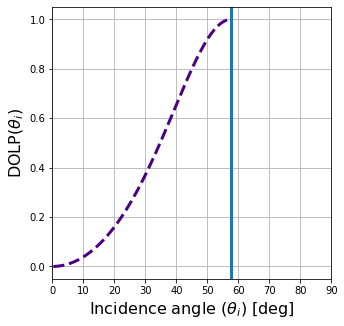

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.580108642578125 seconds
False
AoLP time:  0.040964365005493164 s
Processing data for material : FERROFLUID_EMG905
image_data shape is :  (2048, 2448)
Quad algorithm time  0.0 s
im90 shape is :  (1024, 1224)
Stokes time:  0.04897189140319824 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498053550720215 s
im_DOLP shape is :  (1024, 1224)


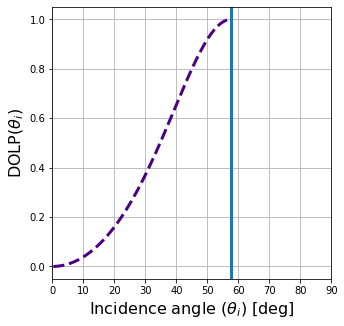

Time for DOLP2Theta conversion is :  23.39763855934143 seconds
False
AoLP time:  0.038977861404418945 s


In [3]:
NUM_IMAGES=1
file_location = "../FLIR_Camera"

filename = "ferrofluid3_flat_45DegCam27cm_BackscatterLightHDPE_AmbientLightOff_BaseIncline0Deg.tiff"
im_theta1, im_phi1 = theta_phi(filename, file_location, 
                               material = 'ferrofluid_EMG905', 
                               num_images= NUM_IMAGES, correction_angle=0)

filename = "ferrofluid3_2magnets_45DegCam27cm_BackscatterLightHDPE_AmbientLightOff_BaseIncline0Deg.tiff"
im_theta2, im_phi2 = theta_phi(filename, file_location, 
                               material = 'ferrofluid_EMG905',
                               num_images= NUM_IMAGES, correction_angle=0)


In [4]:
theta_lower_bound = min(np.min(im_theta1), np.min(im_theta2))
theta_upper_bound = max(np.max(im_theta1), np.max(im_theta2))
phi_lower_bound = min(np.min(im_phi1), np.min(im_phi2))
phi_upper_bound = max(np.max(im_phi1), np.max(im_phi2))

In [5]:
p1 = makeBokehColorbarImage(data=np.round(im_theta1,decimals=0), 
                            lower=theta_lower_bound, higher=theta_upper_bound, 
                            palette = "Viridis256", 
                            title='θ')
p2 = makeBokehColorbarImage(data=np.round(im_phi1,decimals=0), 
                            lower=phi_lower_bound, higher=phi_upper_bound , 
                            palette = "Greys256", 
                            title='ϕ')

In [6]:
p3 = makeBokehColorbarImage(data=np.round(im_theta2,decimals=0),
                            lower=theta_lower_bound, higher=theta_upper_bound, 
                            palette = "Viridis256", 
                            title='θ')
p4 = makeBokehColorbarImage(data=np.round(im_phi2,decimals=0),
                            lower=phi_lower_bound, higher=phi_upper_bound , 
                            palette = "Greys256", 
                            title='ϕ')

In [7]:
# make a grid
grid = gridplot([p1, p2, p3, p4], ncols=2, plot_width = 500, plot_height = 450)
# show(grid)

In [8]:
output_file(os.path.join(file_location,"ferrofluid3_2magnets_45DegCam27cm_BackscatterLightHDPE_AmbientLightOff_BaseIncline0Deg.html"), title='ferrofluid test')

In [9]:
show(grid)

- **Changing AO projection plane for changing illumination orientation:** When light is headon in line with the camera, the angle of plane of polarization is what is expected -- ~ 90 degrees. On the other hand if the light illuminating the surface is oblique, then the angle is different, about 80 degrees for the chosen oblique orientation of the lamp. 
- **Constant AOI with changing orientation:** But the Angle of incidence if found to be near constant 32-35 degrees for oblique and headon illumination. Value does not make a whole lot of sense as the incidence angle is fixed to be 40 degrees. But the constancy idea makes sense. Calibration can be done to check what orientation the computer is seeing